In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys
sys.path.insert(0,"..")
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torchvision

In [3]:
import torchxrayvision as xrv

In [4]:
d_nih = xrv.datasets.NIH_Dataset(#imgpath="/home/cohenjos/projects/rpp-bengioy/jpcohen/ChestXray-NIHCC/images",
                                 imgpath="/lustre04/scratch/cohenjos/NIH/images-224",
                                views=["PA","AP"], unique_patients=False, pathology_masks=True)


In [5]:
d_nih

{'Atelectasis': {0.0: 100561, 1.0: 11559},
 'Cardiomegaly': {0.0: 109344, 1.0: 2776},
 'Consolidation': {0.0: 107453, 1.0: 4667},
 'Edema': {0.0: 109817, 1.0: 2303},
 'Effusion': {0.0: 98803, 1.0: 13317},
 'Emphysema': {0.0: 109604, 1.0: 2516},
 'Fibrosis': {0.0: 110434, 1.0: 1686},
 'Hernia': {0.0: 111893, 1.0: 227},
 'Infiltration': {0.0: 92226, 1.0: 19894},
 'Mass': {0.0: 106338, 1.0: 5782},
 'Nodule': {0.0: 105789, 1.0: 6331},
 'Pleural_Thickening': {0.0: 108735, 1.0: 3385},
 'Pneumonia': {0.0: 110689, 1.0: 1431},
 'Pneumothorax': {0.0: 106818, 1.0: 5302}}


NIH_Dataset num_samples=112120 views=['PA', 'AP']

In [6]:
images_with_masks = d_nih.csv[d_nih.csv.has_masks == True]
images_with_masks

,index,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],has_masks
151,151,00000032_037.png,Cardiomegaly|Edema|Infiltration,37,32,54,F,AP,2500,2048,0.168000,0.168000,True
310,310,00000072_000.png,Atelectasis,0,72,67,F,PA,2450,2839,0.143000,0.143000,True
596,596,00000147_001.png,Atelectasis,1,147,66,F,PA,2742,2948,0.143000,0.143000,True
608,608,00000149_006.png,Atelectasis,6,149,70,M,AP,2500,2048,0.168000,0.168000,True
614,614,00000150_002.png,Atelectasis|Infiltration|Pneumonia,2,150,55,F,AP,3056,2544,0.139000,0.139000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111704,111704,00030606_006.png,Emphysema|Pneumothorax,6,30606,58,M,PA,2021,2021,0.194311,0.194311,True
111791,111791,00030634_000.png,Effusion,0,30634,60,F,PA,2544,3056,0.139000,0.139000,True
111793,111793,00030635_001.png,Atelectasis|Effusion,1,30635,50,F,PA,1798,1815,0.194314,0.194314,True
111807,111807,00030636_004.png,Atelectasis|Infiltration,4,30636,45,M,AP,3056,2544,0.139000,0.139000,True


In [7]:
def plot_sample_with_masks(sample, df):
    fig, axs = plt.subplots(1, 1+len(sample["pathology_masks"]), sharey=True)
    axs[0].imshow(sample["img"][0], cmap="Greys_r");
    axs[0].set_title("idx:" + str(sample["idx"]))
    for i, patho in enumerate(sample["pathology_masks"].keys()):
        axs[i+1].imshow(sample["img"][0], cmap="Greys_r");
        axs[i+1].imshow(sample["pathology_masks"][patho][0]+1, alpha=0.5);
        axs[i+1].set_title(df.pathologies[patho])
    pd.DataFrame(sample["lab"], index=df.pathologies)

In [8]:
sample = d_nih[614]

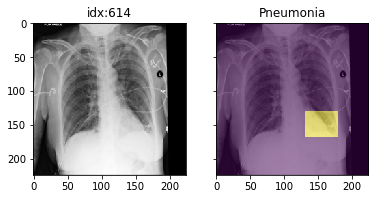

In [9]:
plot_sample_with_masks(sample, d_nih)

In [10]:
sample

{'idx': 614,
 'lab': array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       dtype=float32),
 'img': array([[[ -951.71765,  -951.71765,  -951.71765, ..., -1024.     ,
          -1024.     , -1024.     ],
         [ -943.6863 ,  -943.6863 ,  -943.6863 , ..., -1024.     ,
          -1024.     , -1024.     ],
         [ -935.6549 ,  -935.6549 ,  -943.6863 , ..., -1024.     ,
          -1024.     , -1024.     ],
         ...,
         [ -871.40393,  -871.40393,  -951.71765, ..., -1024.     ,
          -1024.     , -1024.     ],
         [ -887.4667 ,  -911.5608 ,  -951.71765, ..., -1024.     ,
          -1024.     , -1024.     ],
         [ -935.6549 ,  -951.71765,  -967.7804 , ..., -1024.     ,
          -1024.     , -1024.     ]]], dtype=float32),
 'pathology_masks': {12: array([[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ...,

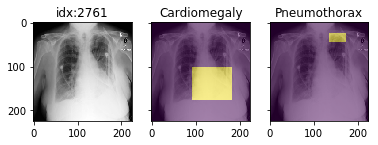

In [11]:
subset = d_nih.csv["Image Index"] == "00000732_005.png"
for idx in np.where(subset)[0][:10]:
    plot_sample_with_masks(d_nih[idx], d_nih)

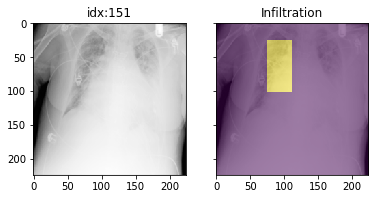

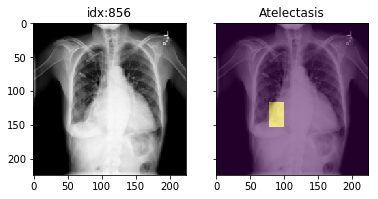

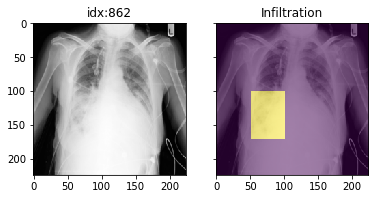

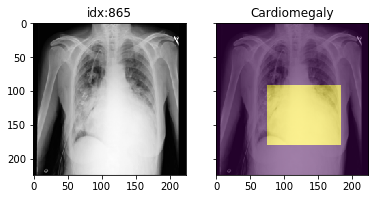

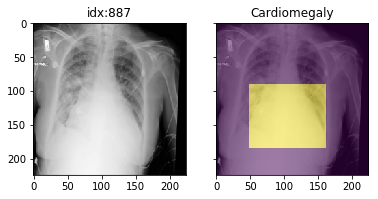

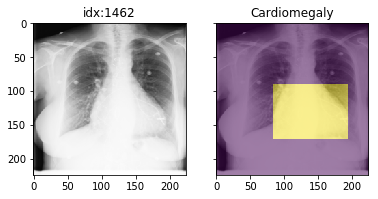

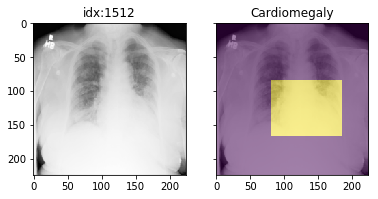

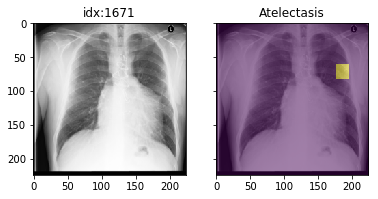

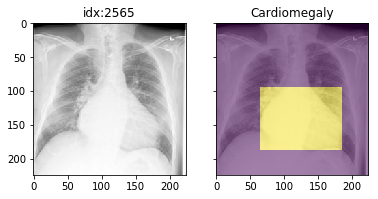

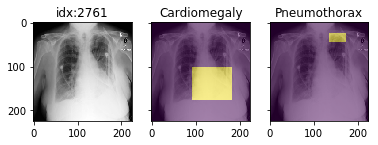

In [12]:
subset = d_nih.csv["Finding Labels"].str.contains("Cardio") & (d_nih.csv.has_masks == True)
for idx in np.where(subset)[0][:10]:
    plot_sample_with_masks(d_nih[idx], d_nih)

In [13]:
import torchvision, torchvision.transforms
transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(224)])

data_transforms = torchvision.transforms.Compose([
        xrv.datasets.ToPILImage(),
        torchvision.transforms.RandomAffine(45, translate=(0.15, 0.15), scale=(0.85, 1.15)),
        torchvision.transforms.ToTensor()
    ])

In [14]:
d_nih_aug = xrv.datasets.NIH_Dataset(#imgpath="/home/cohenjos/projects/rpp-bengioy/jpcohen/ChestXray-NIHCC/images",
                                 imgpath="/lustre04/scratch/cohenjos/NIH/images-224",
                                 views=["PA","AP"], unique_patients=False, pathology_masks=True,
                                 transform=transform,
                                 data_aug=data_transforms)


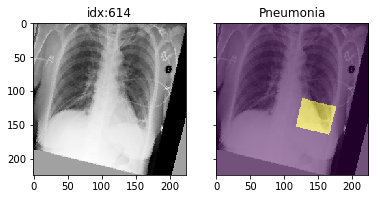

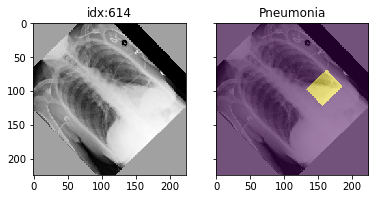

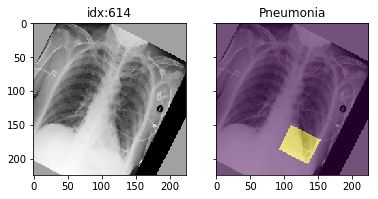

In [17]:
for i in range(3):
    sample = d_nih_aug[614]
    plot_sample_with_masks(sample, d_nih_aug)

In [18]:
#RSNA_Pneumonia_Dataset
d_rsna = xrv.datasets.RSNA_Pneumonia_Dataset(imgpath="/home/cohenjos/projects/rpp-bengioy/jpcohen/kaggle-pneumonia/stage_2_train_images_jpg", 
                                            views=["PA","AP"],
                                            pathology_masks=True)


In [19]:
d_rsna

{'Lung Opacity': {0.0: 20672, 1.0: 6012}, 'Pneumonia': {0.0: 20672, 1.0: 6012}}


RSNA_Pneumonia_Dataset num_samples=26684 views=['PA', 'AP']

In [20]:
d_rsna.csv.has_masks.value_counts()

False    20672
True      6012
Name: has_masks, dtype: int64

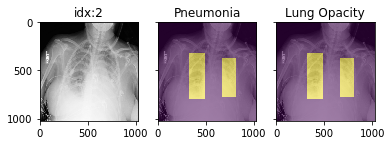

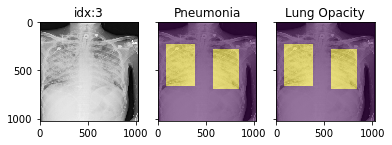

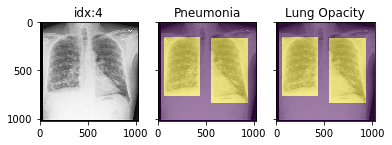

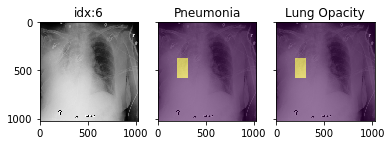

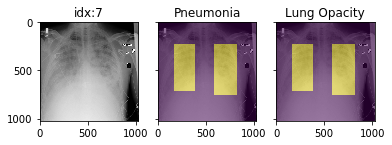

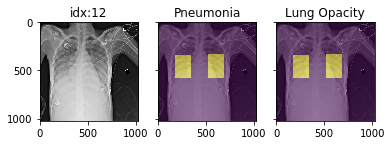

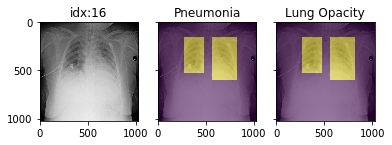

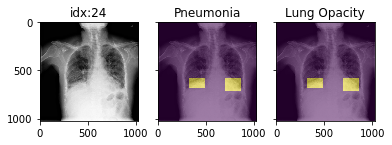

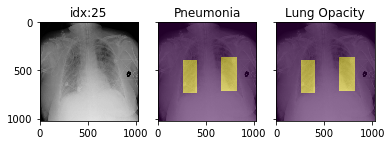

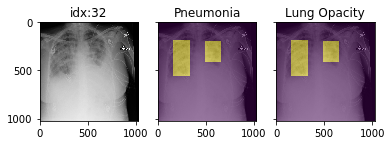

In [21]:
for idx in np.where(d_rsna.csv.has_masks)[0][:10]:
    plot_sample_with_masks(d_rsna[idx], d_rsna)

In [22]:
import torchvision, torchvision.transforms
transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(224)])

data_transforms = torchvision.transforms.Compose([
        xrv.datasets.ToPILImage(),
        torchvision.transforms.RandomAffine(45, translate=(0.15, 0.15), scale=(0.85, 1.15)),
        torchvision.transforms.ToTensor()
    ])

In [23]:
#RSNA_Pneumonia_Dataset
d_rsna = xrv.datasets.RSNA_Pneumonia_Dataset(imgpath="/home/cohenjos/projects/rpp-bengioy/jpcohen/kaggle-pneumonia/stage_2_train_images_jpg", 
                                            views=["PA","AP"],
                                            pathology_masks=True,
                                            transform=transform,
                                            data_aug=data_transforms)


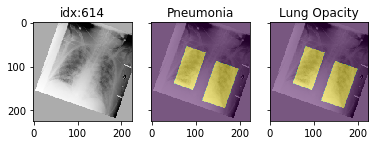

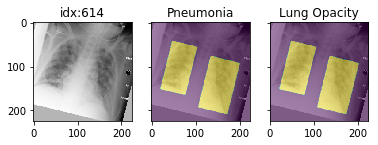

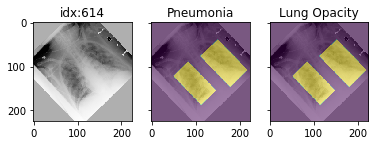

In [25]:
for i in range(3):
    sample = d_rsna[614]
    plot_sample_with_masks(sample, d_rsna)